<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Homework2" data-toc-modified-id="Homework2-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Homework2</a></span></li></ul></li><li><span><a href="#Школа-GataScientist,-декабрь-2022,-Андреева-Ольга" data-toc-modified-id="Школа-GataScientist,-декабрь-2022,-Андреева-Ольга-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Школа GataScientist, декабрь 2022, Андреева Ольга</a></span></li><li><span><a href="#Собрать-информацию-о-всех-строящихся-объектах-на-сайте-&quot;наш.дом.рф&quot;." data-toc-modified-id="Собрать-информацию-о-всех-строящихся-объектах-на-сайте-&quot;наш.дом.рф&quot;.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф".</a></span></li><li><span><a href="#Проверить-состояние-датафрейма-и-привести-его-в-формат,-позволяющий-дальнейшее-исследование-данных:" data-toc-modified-id="Проверить-состояние-датафрейма-и-привести-его-в-формат,-позволяющий-дальнейшее-исследование-данных:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:</a></span></li></ul></div>

## Homework2
# Школа GataScientist, декабрь 2022, Андреева Ольга

# Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф".
Cохранить ее в pandas dataframe

In [78]:
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [ ]:
#функция для получения общего количества id-шников
def getTotalCount():
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset=1&limit=1&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
    res = requests.get(url)
    return  res.json().get('data').get('total')

#функция для чтения пачки id-шников
def readIDs(p_offset, p_limit):
    c_http_success = 200
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={p_offset}&limit={p_limit}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
    res = requests.get(url)
    if res.status_code == c_http_success:
        try:
            objects_data = res.json()
            objects_list = objects_data.get('data').get('list')
            return {'state': c_http_success, 'data':[x.get('objId') for x in objects_list]}
        except IndexError:
            return({'state': c_http_success,'data': []});
    else:
        return({'state': res.status_code, 'data': []})
    
#функция для чтения объекта по id-шнику
def readObjectData (p_ObjID):
    # Для скачивания данных по определенному объекту, нужно добавить его id в конец строки запроса
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{p_ObjID}'
    res = requests.get(url)
    return res.json().get('data')    

In [ ]:
v_offset = 1
v_limit = 100
c_max_limit = getTotalCount() #getTotalCount() - если надо скачать ВСЕ записи
lst_Objects=[]
df_Objects=pd.DataFrame([])
c_http_success = 200

print ("must get: ", c_max_limit)

from datetime import datetime
import time
start_time = datetime.now()

while True:
    #обработка ограничения по количеству записей
    if v_offset + v_limit > c_max_limit:
        v_limit = c_max_limit - v_offset + 1
    
    v_IDs_bath = readIDs(v_offset, v_limit) #cчитали порцию id-шников
    
    if v_IDs_bath.get('state') != c_http_success:
        print (v_IDs_bath.get('state'), "на ", v_offset, "!")
    else:
        v_IDs=v_IDs_bath.get('data')
        print(v_offset, " - code ", v_IDs_bath.get('state'))
        #читаем каждый объект по ID
        lst_Objects=[]
        for i in (v_IDs):
            v_Object=readObjectData(i) 
            lst_Objects.append(v_Object)

        #добавляем пачку объектов в датафрейм
        df_Objects=df_Objects.append(pd.DataFrame(lst_Objects),ignore_index=True)     
 
    v_offset += v_limit
    print ("have got: ", v_offset-1)
    if len(v_IDs)<v_limit or v_offset>c_max_limit: break

print('Time: ', datetime.now() - start_time)
   
    

Cохранить pandas dataframe в excel

In [ ]:
df_Objects.head(5)

In [ ]:
df_Objects.to_excel("./df_Objects.xlsx")


In [821]:
#прочитали - забэкапили
df_Objects=pd.read_excel("./df_Objects.xlsx")
df_Objects_bkp=df_Objects.copy()


In [841]:
df_Objects=df_Objects_bkp.copy()

# Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
    -- Привести колонки датафрейма к одному типу данных
    -- Проверить индекс, чтобы он соответствовал порядку строк 
    -- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки

In [842]:
#колонки, которые будем использовать в анализе
map_columns=dict({'address':'адрес',
'developer':'застройщик',
'floorMax':'Этаж макс',
'floorMin':'этаж мин',
#'generalContractorNm':'Генподрядчик',
'greenAreaIndexValue':'Индекс зеленой зоны',
'id':'id',
'infrastructureIndexValue':'Индекс доступности инфраструктуры',
#'loadDttm':'дата загрузки',
'nameObj':'Название объекта',
'nonlivFirstFloor':'1 этаж нежилой',
'objCompensFundFlg':'гарантии фонда',
'objElemLivingCnt':'жилых помещениий',
'objElemParkingCnt':'паркомест',
'objElevatorCargoCnt':'грузовых лифтов',
'objElevatorCargoPassengerCnt':'грузопассажирских лифтов',
'objElevatorPassengerCnt':'пассажирских лифтов',
'objElevatorWheelchairCnt':'инвалидных подъемников',
'objEnergyEffShortDesc':'энергоэффективность',
'objFlatCnt':'квартр',
'objFlatSq':'площадь квартир',
'objFloorCnt':'этажность',
'objGreenHouseFlg':'зеленый дом',
'objGuarantyEscrowFlg':'Продажа квартир через счета эскроу',
'objInfrstrBicycleLaneFlg':'велодорожки',
'objInfrstrCurbLoweringFlg':'Наличие понижающих площадок',
'objInfrstrNotObjPrkngCnt':'парковки внутри территории',
'objInfrstrObjPrkngCnt':'парковки вне территории',
'objInfrstrPlaygrndCnt':'игровые площадки',
'objInfrstrRampFlg':'пандус',
'objInfrstrSportGroundCnt':'спортплощадки',
'objInfrstrTrashAreaCnt':'мусорных площадок',
'objLivCeilingHeight':'высота потолков',
'objLkClassDesc':'тип застройки',
'objLkFinishTypeDesc':'отделка',
'objLkFreePlanDesc':'свободная планировка',
'objLkLatitude':'широта',
'objLkLongitude':'долгота',
#'objLkSaleDepEmail':'е-мейл',
'objNonlivElemCnt':'нежилых помещений',
'objPriceAvg':'средняя цена м2',
'objProblemFlg':'проблемный',
'objReady100PercDt':'дата сдачи',
'objSquareLiving':'площадь жилых',
'objStatus':'статус',
'objectTransportInfo':'транспорт',
'residentialBuildings':'жилой объект',
'region':'регион',
'soldOutPerc':'продано %',
'wallMaterialShortDesc':'материал стен',
##колонки, которые выделим по ходу
'devId':'ID застройщика',
'devRegion':'регион застройщика',
'objectDistToMetro':'расстояние до метро'
})


In [843]:
#оставлю только интересные столбцы 
df_Objects=df_Objects.loc[:,list(map_columns.keys())]

In [844]:
#преобразование высоты потолков в число
import re
def CeilingHeight_to_number(p_height):
    try:
        v_height=p_height.replace(',','.')
        res=re.findall('\d+(?:\.\d+)?', v_height)
        res=[float(n) for n in res]
        return max(res)   
    except ValueError:
        return None
    except AttributeError:
        return None
CeilingHeight_to_number(None)

#вычисление ближайшего растояния до метро
def DistToMetro (p_sttn_list):
    try:
        v_sttns=[s.get('metroStationDistLength') for s in p_sttn_list]
        return min(v_sttns)
    except ValueError:
        return None
    except AttributeError:
        return None


In [845]:
#преобразование типов
# от застройщика оставляю только ID и регион
df_Objects['developer']=df_Objects['developer'].apply(eval)
df_Objects['devId']=df_Objects['developer'].apply(lambda x: x.get('devId'))
df_Objects['devRegion']=df_Objects['developer'].apply(lambda x: x.get('devOrgRegRegionCd'))
df_Objects=df_Objects.drop('developer', axis=1)

#от транспортной доступности оставляю расстояние до ближайшего метро
df_Objects['objectDistToMetro']=df_Objects['objectTransportInfo'].apply(eval).apply(lambda x: DistToMetro(x))
df_Objects=df_Objects.drop('objectTransportInfo', axis=1)

#дату сдачи - в дату
df_Objects['objReady100PercDt']=pd.to_datetime(df_Objects['objReady100PercDt'], format="%Y-%m-%d")

#высоту потолков - в число
df_Objects['objLivCeilingHeight']=df_Objects['objLivCeilingHeight'].apply(lambda x: CeilingHeight_to_number(x))

#свободную планировку - в число
df_Objects['objLkFreePlanDesc']=df_Objects['objLkFreePlanDesc'].map({'Есть':1, 'Нет':2})

In [846]:
#преобразование классов энергоэффективности, классса жилья, типа отделки
print((df_Objects['objEnergyEffShortDesc'].unique()))
print(df_Objects['objLkClassDesc'].unique())
print(df_Objects['objLkFinishTypeDesc'].unique())

['B' 'D' 'C' 'A++' 'A' 'A+' 'Не нормируется' 'F' 'E' 'G']
['Элитный' 'Комфорт' 'Другое' 'Бизнес' 'Типовой']
['По желанию заказчика' 'Без отделки' 'Под чистовую' 'Под ключ' 'Другое']


In [847]:
map_objEnergy = dict({'A++':1, 'A+':2, 'A':3, 'B':4, 'C':5, 'D':6, 'E':7, 'F':8, 'G':9, 'Не нормируется':10})
df_Objects['objEnergyEffShortDesc']=df_Objects['objEnergyEffShortDesc'].map(map_objEnergy)

map_LkClass = dict({'Другое':0, 'Типовой':1, 'Комфорт':2, 'Бизнес':3, 'Элитный':4})
df_Objects['objLkClassDesc']=df_Objects['objLkClassDesc'].map(map_LkClass)

In [848]:
p=[x for x in range(0, 5)]
print(p)

[0, 1, 2, 3, 4]


In [849]:
v_clmns=['objLkFinishTypeDesc','wallMaterialShortDesc']
for v_clmn in v_clmns:
    v_values=np.sort(df_Objects[v_clmn].unique())
    print(v_values,  [x for x in range(0, len(v_values))])
    map_clmn=dict(zip(v_values, range(0, len(v_values))))
    df_Objects[v_clmn]=df_Objects[v_clmn].map(map_clmn)



['Без отделки' 'Другое' 'По желанию заказчика' 'Под ключ' 'Под чистовую'] [0, 1, 2, 3, 4]
['Блоки' 'Другое' 'Кирпич' 'Монолит' 'Монолит-кирпич' 'Панель'] [0, 1, 2, 3, 4, 5]


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    s=df_Objects.dtypes
    print(s.sort_values())

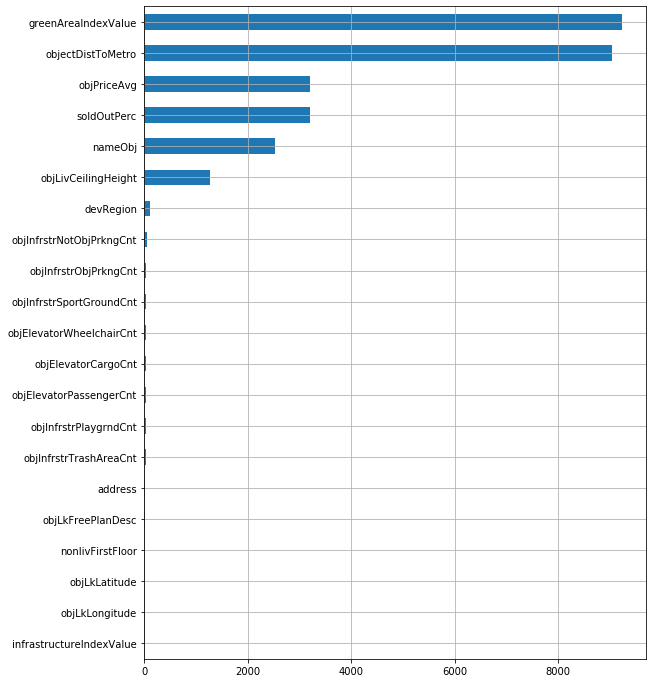

In [851]:
# Посмотрим, что у нас по пропущенным данным
s_Missing=pd.Series([])
for clmn in df_Objects.columns:
    is_empty = df_Objects[clmn].isnull()
    empty_cnt = np.sum(is_empty)
    s_Missing[clmn] = empty_cnt
# визуализируем
if s_Missing[s_Missing>0].empty==False:
    from pylab import rcParams
    rcParams['figure.figsize'] = 9,12
    s_Missing[s_Missing>0].sort_values(ascending=True).plot(kind='barh')
    plt.grid(True)
    plt.show()
else:
    print ("Ура, пустых значений нет!")


In [852]:
#заполним нулями пропущенные даныые в колонках "количество..."
# и в колонках 'свободная планировка', '1 этаж нежилой', 'Индекс доступности инфраструктуры', 'продано %', 
s_fill_zero=list(s_Missing[s_Missing.index.str.endswith('Cnt')].index)
s_fill_zero.extend(['objLkFreePlanDesc', 'nonlivFirstFloor', 'infrastructureIndexValue', 'soldOutPerc'])
df_Objects[s_fill_zero]=df_Objects[s_fill_zero].fillna(0)

# 'расстояние до метро' дозаполним нереально большим значением
c_veryBigNum=1000
df_Objects['objectDistToMetro']=df_Objects['objectDistToMetro'].fillna(c_veryBigNum)

In [853]:
#удалим колонки, ктотрые не заполнеы более чем на 50%
#for clmn in s_Missing[s_Missing>len(df_Objects.index)/2].index:
df_Objects=df_Objects.drop(s_Missing[s_Missing>len(df_Objects.index)/2].index, axis=1)
s_Missing=s_Missing.drop(s_Missing[s_Missing>len(df_Objects.index)/2].index)


In [854]:
#Заполним пропущенную 'высоту потолков' средним значением
v_mean_Height=df_Objects['objLivCeilingHeight'].mean()
df_Objects['objLivCeilingHeight']=df_Objects['objLivCeilingHeight'].fillna(v_mean_Height)

In [855]:
#Заполним пропущенные 'средняя цена м2','широта','долгота' средними по региону
v_clmns=['objPriceAvg', 'objLkLatitude', 'objLkLongitude']
s_means=df_Objects.groupby(by='region')[v_clmns].transform('mean')
df_Objects[v_clmns]=df_Objects[v_clmns].fillna(s_means)

#если еще oостались незаполненные, то заполняем нулями 
df_Objects[v_clmns]=df_Objects[v_clmns].fillna(0)

In [856]:
#поищем пропущенный регион застройщика по id застройщика
s_means=df_Objects.groupby(by='devId')['devRegion'].transform('max')
df_Objects['devRegion']=df_Objects['devRegion'].fillna(s_means)

#если не нашлось - заполним регионом объекта
df_Objects['devRegion']=df_Objects['devRegion'].fillna(df_Objects['region'])

In [857]:
#объединим название объекта и адрес в одну колонку
df_Objects[['nameObj','address']]=df_Objects[['nameObj','address']].fillna('unknown')
df_Objects['nameObj']=df_Objects['nameObj']+' / '+df_Objects['address']
df_Objects=df_Objects.drop(['address'],axis=1)

In [858]:
df_Objects

,floorMax,floorMin,id,infrastructureIndexValue,nameObj,nonlivFirstFloor,objCompensFundFlg,objElemLivingCnt,objElemParkingCnt,objElevatorCargoCnt,...,objProblemFlg,objReady100PercDt,objSquareLiving,objStatus,residentialBuildings,region,soldOutPerc,wallMaterialShortDesc,devId,devRegion
0,20,4,13383,10.0,unknown / г Тюмень,1.0,1,68,31,1.0,...,0,2022-12-31,6296.55,0,1,72,0.406985,1,306,72.0
1,10,7,13398,10.0,"unknown / г Тюмень, ул Профсоюзная, д. 56",0.0,0,43,0,3.0,...,0,2024-12-31,4812.98,0,1,72,1.000000,1,306,72.0
2,12,6,13397,10.0,"unknown / г Тюмень, ул Профсоюзная, д. 56",0.0,0,65,0,4.0,...,0,2024-12-31,6248.51,0,1,72,0.999984,1,306,72.0
3,1,1,13399,10.0,"unknown / г Тюмень, ул Профсоюзная, д. 56",1.0,0,0,125,7.0,...,0,2024-12-31,0.00,0,0,72,0.917243,1,306,72.0
4,10,2,36912,8.0,"unknown / г Ставрополь, ул Шпаковская, Доватор...",1.0,0,104,42,0.0,...,0,2022-12-31,8295.20,0,1,26,0.609216,4,10296,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10787,26,26,28071,8.0,"Жилой комплекс""Томилинский бульвар"" / г Котель...",1.0,1,288,0,4.0,...,0,2024-06-30,14870.40,0,1,50,0.071155,1,7344,50.0
10788,26,2,28070,8.0,"Жилой комплекс""Томилинский бульвар"" / г Котель...",1.0,1,768,0,8.0,...,0,2025-03-31,29620.10,0,1,50,0.072883,1,7344,50.0
10789,26,26,28073,8.0,"Жилой комплекс""Томилинский бульвар"" / г Котель...",1.0,1,312,0,4.0,...,0,2024-06-30,14872.80,0,1,50,0.070834,1,7344,50.0
10790,6,6,44447,7.0,"unknown / г Ярославль, Фрунзенский район, терр...",0.0,0,127,0,0.0,...,0,2022-12-31,6764.22,0,1,76,0.255401,2,2538,76.0


In [433]:
df_Objects[v_clmns]=df_Objects[v_clmns].fillna(s_means

,objPriceAvg,objLkLatitude,objLkLongitude
region,,,
1,69905.302326,44.927002,39.138750
2,83705.561224,54.666723,55.672878
3,69863.952381,51.819523,107.651150
4,83012.400000,51.971267,85.928233
5,29344.307692,43.033700,47.425665
...,...,...,...
79,NaN,48.805900,132.898000
86,87388.783784,61.332741,71.828416
89,97163.142857,65.877205,71.853186


In [291]:
df_Objects[df_Objects.objLkLongitude.isnull()]

,address,developer,floorMax,floorMin,generalContractorNm,id,infrastructureIndexValue,loadDttm,nameObj,nonlivFirstFloor,...,objNonlivElemCnt,objPriceAvg,objProblemFlg,objReady100PercDt,objSquareLiving,objStatus,objectTransportInfo,residentialBuildings,soldOutPerc,wallMaterialShortDesc
1624,"д Ермолово, район Заволжское сельское поселени...","{'devId': 12098, 'devShortCleanNm': 'ПРАКТИК',...",3,3,NaN,45585,1.0,14-12-2022 01:24,NaN,0.0,...,0,NaN,0,2022-06-30,1652.67,0,[],1,NaN,Кирпич
4349,"г Сочи, район Хостинский, ул Шоссейная, д. 2","{'devId': 13244, 'devShortCleanNm': 'СЗ КАПИТА...",13,13,"ООО ""ВОСТОК-Д"" (ИНН: 2366002540)",48508,1.0,14-12-2022 01:24,NaN,1.0,...,1043,NaN,0,2027-09-30,0.00,0,[],0,NaN,Монолит-кирпич
8549,"г Владимир, жилой район веризино Микрорайон 2,...","{'devId': 14044, 'devShortCleanNm': 'СЗ ФАКЕЛ-...",4,1,"ООО ""СМУ-54"" (ИНН: 3328456819)",46569,1.0,14-12-2022 01:24,NaN,0.0,...,0,NaN,0,2022-12-31,1819.18,0,[],1,NaN,Другое
10218,"с Учкекен, Переулок Первомайский, д. 37, корпус 2","{'devId': 11417, 'devShortCleanNm': 'СТРОИТЕЛЬ...",8,1,NaN,41935,1.0,14-12-2022 01:24,NaN,0.0,...,0,NaN,0,2023-09-30,3596.90,0,[],1,NaN,Другое
10219,"с Учкекен, Первомайский, д. 37, корпус 1","{'devId': 11417, 'devShortCleanNm': 'СТРОИТЕЛЬ...",8,1,NaN,41936,1.0,14-12-2022 01:24,NaN,0.0,...,0,NaN,0,2023-06-30,3596.90,0,[],1,NaN,Другое


In [285]:
df_Objects[df_Objects.objElevatorCargoCnt>0][['id','objElevatorCargoCnt']]

,id,objElevatorCargoCnt
0,13383,1.0
1,13398,3.0
2,13397,4.0
3,13399,7.0
13,30292,8.0
...,...,...
10785,28072,4.0
10786,28074,8.0
10787,28071,4.0
10788,28070,8.0


In [283]:
is_empty = df_Objects['objElevatorCargoCnt'].isnull()
empty_cnt = np.sum(is_empty)
empty_cnt

0

In [234]:
s_Missing[s_Missing>0]

address                       26
generalContractorNm         3358
infrastructureIndexValue       1
nameObj                     2531
nonlivFirstFloor               5
objElevatorCargoCnt           41
objElevatorPassengerCnt       41
objElevatorWheelchairCnt      41
objInfrstrNotObjPrkngCnt      53
objInfrstrObjPrkngCnt         46
objInfrstrPlaygrndCnt         41
objInfrstrSportGroundCnt      43
objInfrstrTrashAreaCnt        41
objLivCeilingHeight         1274
objLkFreePlanDesc              9
objLkLatitude                  5
objLkLongitude                 5
objLkSaleDepEmail           3031
objPriceAvg                 3212
soldOutPerc                 3204
dtype: int64